<a href="https://colab.research.google.com/github/soumya2000-paul/EDA/blob/main/google_playstore_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('google-playstore-eda')
jovian.set_colab_id('1Xmx_WsklDQTDezKCO3fUIlRCQrJWil_P')

     |████████████████████████████████| 68 kB 3.6 MB/s 


# google-playstore-eda

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="google-playstore-eda")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/soumya2000-paul/google-playstore-eda


'https://jovian.ai/soumya2000-paul/google-playstore-eda'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
%matplotlib inline

In [10]:
google_data = pd.read_csv('/content/googleplaystore.csv')
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
google_data.shape

(10841, 13)

In [12]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [14]:
px.box(google_data,y='Rating')

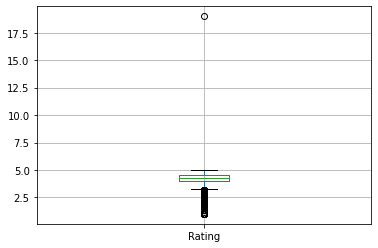

In [16]:
google_data.boxplot()

In [17]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##Data Cleaning

In [18]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


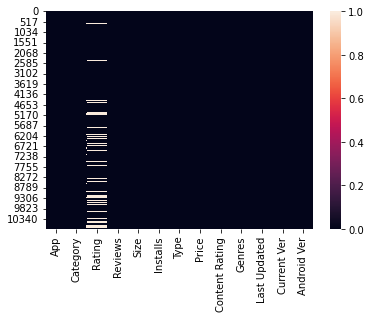

In [20]:
sns.heatmap(google_data.isnull())

In [21]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Finding the outliers

In [23]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
google_data.drop([10472],inplace=True)

In [25]:
px.box(google_data,y='Rating')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa581147410>]],
      dtype=object)

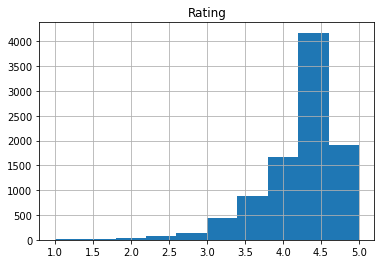

In [26]:
google_data.hist()

## Remove columns that are 90% empty

In [27]:
threshold = len(google_data) * 0.1
threshold

1084.0

In [28]:
google_data.dropna(thresh=threshold,axis=1,inplace=True)

In [29]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## Data imputation & manipulatio

### Filling the null values using aggregate funtions like mean , meadian, mode

In [30]:
def inpute_median(series):
  return series.fillna(series.median())

In [31]:
google_data.Rating = google_data['Rating'].transform(inpute_median)

In [32]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [33]:
# for categorical value fill with mode
print(google_data['Type'].mode())
print('~~~~~~~~~~~~~')
print(google_data['Current Ver'].mode())
print('~~~~~~~~~~~~~~~~~')
print(google_data['Android Ver'].mode())

0    Free
dtype: object
~~~~~~~~~~~~~
0    Varies with device
dtype: object
~~~~~~~~~~~~~~~~~
0    4.1 and up
dtype: object


In [35]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace= True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace= True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace= True)

In [36]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### let's convert price and reviws to numarical data

In [41]:
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'], errors='coerce')

In [42]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [43]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [44]:
google_data.describe() #summery stats after cleaning

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


###Data visualization

In [87]:
grp = google_data.groupby('Category')
W = grp['Installs'].agg(np.mean)
X = grp['Rating'].agg(np.mean)
Y = grp['Price'].agg(np.sum)
Z = grp['Reviews'].agg(np.mean)
print(W)
print('~~~~~~~~~~~~~~')
print(X)
print('~~~~~~~~~~~')
print(Y)
print('~~~~~~~~~~~~~~~~')
print(Z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

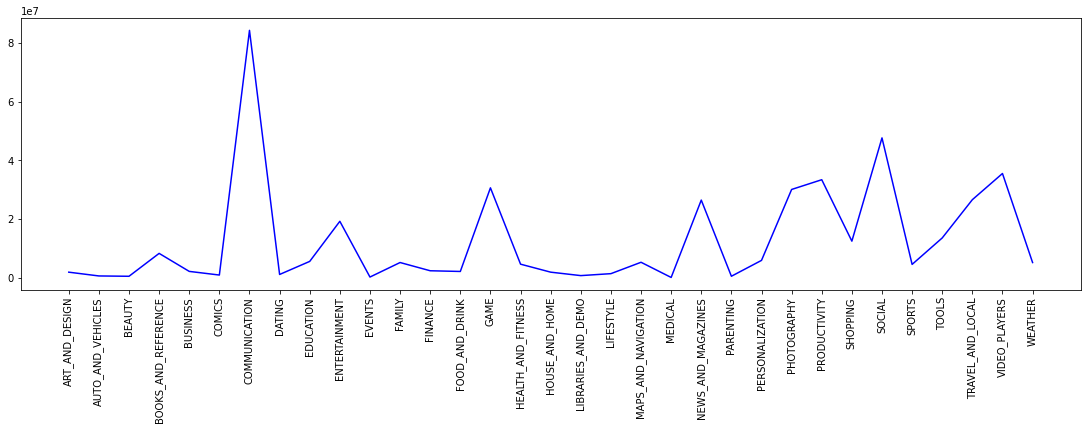

In [88]:
plt.figure(figsize=(19,5))
plt.plot(W,color='b')
plt.xticks(rotation=90)
plt.show()

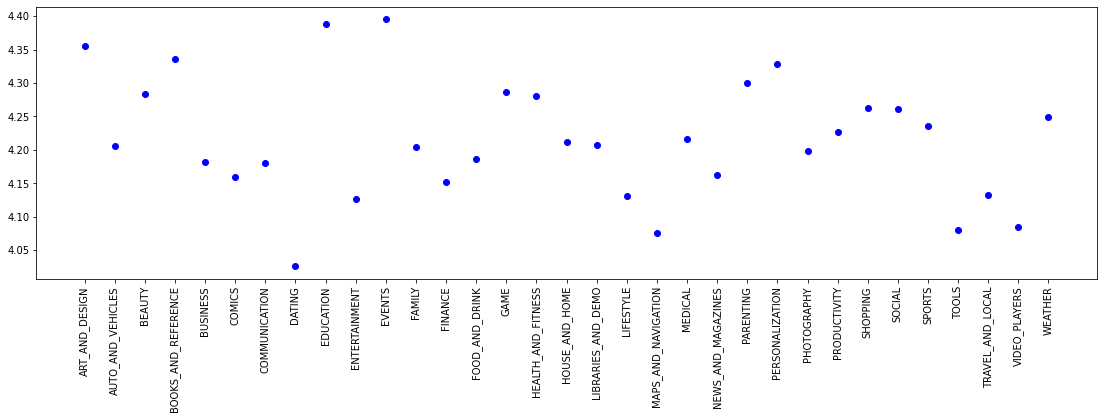

In [55]:
plt.figure(figsize=(19,5))
plt.plot(X,'ro',color='b')
plt.xticks(rotation=90)
plt.show()

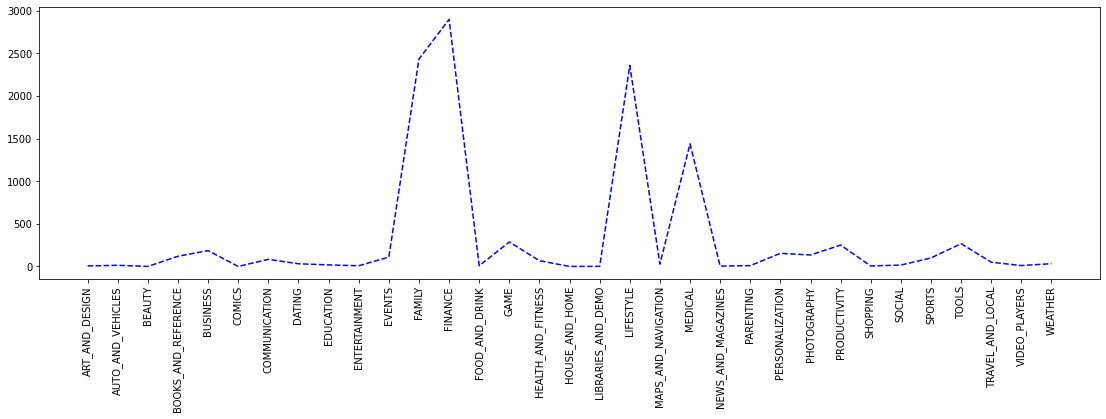

In [82]:
plt.figure(figsize=(19,5))
plt.plot(Y,'r--',color='b')
plt.xticks(rotation=90)
plt.show()

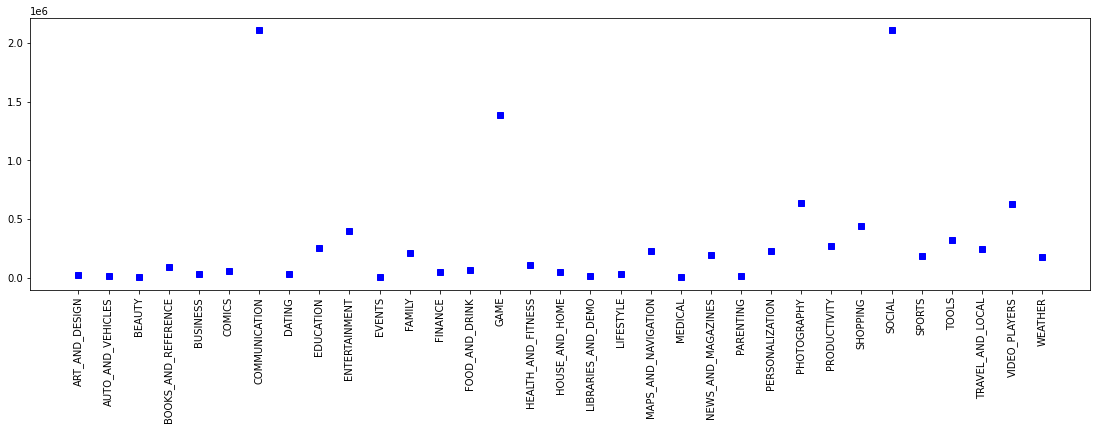

In [83]:
plt.figure(figsize=(19,5))
plt.plot(Z,'bs',color='b')
plt.xticks(rotation=90)
plt.show()

In [90]:
px.scatter(X,x=X.index,y=X.values)

In [89]:
px.bar(W,x=W.index,y=W.values,color=W.index)

In [78]:
px.bar(Y,x=Y.index,y=Y.values,color=Y.index)

In [79]:
px.bar(Z,x=Z.index,y=Z.values,color=Z.index)